In [1]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"

print(f"Using Device = {device}")

Using Device = cpu


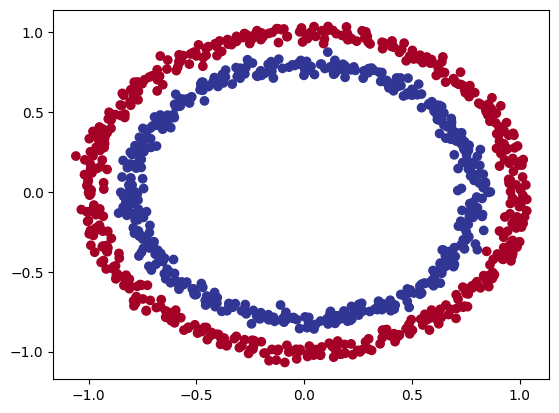

In [3]:
from sklearn.datasets import make_circles

x , y = make_circles(n_samples=1000 , noise=0.03,random_state=42)
plt.scatter(x[:,0] , x[:,1] ,c=y , cmap=plt.cm.RdYlBu)

In [4]:
print(type(x) , x.shape)
print(type(y) , y.shape)

<class 'numpy.ndarray'> (1000, 2)
<class 'numpy.ndarray'> (1000,)


In [5]:
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
print(type(x) , x.shape)
print(type(y) , y.shape)



<class 'torch.Tensor'> torch.Size([1000, 2])
<class 'torch.Tensor'> torch.Size([1000])


In [6]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=42)


In [7]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2 , out_features=10)
        self.layer_2 = nn.Linear(in_features=10 , out_features=10)
        self.layer_3 = nn.Linear(in_features=10 , out_features=1)
        self.relu = nn.ReLU()
    
    def forward(self , x):
        out1 = self.relu(self.layer_1(x))
        out2 = self.relu(self.layer_2(out1))
        out3 = self.layer_3(out2)
        return out3
        
        

In [8]:
model = NeuralNetwork()
model

NeuralNetwork(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [9]:
model.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.1855, -0.6256],
                      [ 0.4614,  0.2964],
                      [ 0.2167, -0.0835],
                      [-0.0445, -0.3460],
                      [ 0.2605,  0.0218],
                      [ 0.2807, -0.3704],
                      [-0.3037,  0.4888],
                      [-0.4073, -0.6076],
                      [ 0.3679,  0.0739],
                      [-0.4648, -0.4579]])),
             ('layer_1.bias',
              tensor([-0.4905, -0.0456, -0.2120, -0.6736,  0.4474, -0.0236,  0.6187, -0.2035,
                      -0.0059, -0.4033])),
             ('layer_2.weight',
              tensor([[-0.1750,  0.1291, -0.2157,  0.1390, -0.0339, -0.1674, -0.1284, -0.2667,
                        0.0418, -0.1974],
                      [ 0.3072, -0.0662,  0.0396,  0.1797, -0.2494, -0.1907,  0.0580,  0.0651,
                        0.1220,  0.1416],
                      [ 0.2161, -0.0249, -0.0431,  0.2872, -0.0029, -0.2

In [10]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr = 0.1)


In [11]:
def accuracy_fn(y_true , y_pred):
    correct = torch.eq(y_true , y_pred).sum().item()
    acc = (correct/len(y_pred)*100)
    return acc

In [12]:
epochs = 2000
train_loss_list = []
test_loss_list = []
torch.manual_seed(42)
torch.cuda.manual_seed(42)
x_train,y_train = x_train.to(device) , y_train.to(device)
x_test , y_test = x_test.to(device) , y_test.to(device)
model.to(device)

for epoch in range(epochs):
    # Training MODE
    model.train()
    ## 1. Forward Pass
    y_logits = model(x_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    ## 2. Compute loss
    loss = loss_fn(y_logits , y_train)
    acc = accuracy_fn(y_true=y_train , y_pred=y_pred)
    ## 3 Zero Grad the Optimizer
    optimizer.zero_grad()
    ## 4 Back Propagates
    loss.backward()
    ## 5 Step the Optimizer
    optimizer.step()
    ## Testing Mode
    model.eval()
    with torch.inference_mode():
        test_logits = model(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits , y_test)
        test_acc = accuracy_fn(y_true=y_test,y_pred=test_pred)
    train_loss_list.append(loss.item())
    test_loss_list.append(test_loss.item())
    if(epoch+1)%100 ==0:
        print(f"Epoch : {epoch+1} | Train Loss : {loss:.4f} | Train Acc: {acc:.2f} | Test Loss: {test_loss:.4f}| Test Acc: {test_acc:.2f} ")

Epoch : 100 | Train Loss : 0.6929 | Train Acc: 53.00 | Test Loss: 0.6937| Test Acc: 51.00 
Epoch : 200 | Train Loss : 0.6903 | Train Acc: 54.87 | Test Loss: 0.6920| Test Acc: 54.00 
Epoch : 300 | Train Loss : 0.6879 | Train Acc: 55.25 | Test Loss: 0.6907| Test Acc: 52.00 
Epoch : 400 | Train Loss : 0.6847 | Train Acc: 57.88 | Test Loss: 0.6888| Test Acc: 53.50 
Epoch : 500 | Train Loss : 0.6801 | Train Acc: 63.50 | Test Loss: 0.6861| Test Acc: 59.00 
Epoch : 600 | Train Loss : 0.6735 | Train Acc: 66.88 | Test Loss: 0.6821| Test Acc: 62.00 
Epoch : 700 | Train Loss : 0.6637 | Train Acc: 69.75 | Test Loss: 0.6752| Test Acc: 67.00 
Epoch : 800 | Train Loss : 0.6482 | Train Acc: 72.00 | Test Loss: 0.6638| Test Acc: 68.50 
Epoch : 900 | Train Loss : 0.6190 | Train Acc: 77.00 | Test Loss: 0.6396| Test Acc: 69.00 
Epoch : 1000 | Train Loss : 0.5572 | Train Acc: 93.00 | Test Loss: 0.5848| Test Acc: 86.50 
Epoch : 1100 | Train Loss : 0.4436 | Train Acc: 97.25 | Test Loss: 0.4851| Test Acc: 93.5

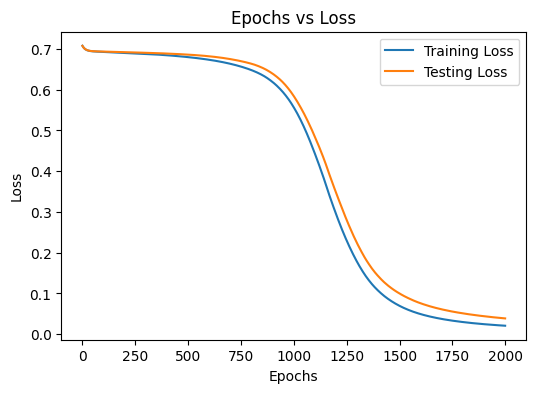

In [13]:
# Plot the Loss Curve
plt.figure(figsize=(6,4))
plt.plot(range(epochs), train_loss_list, label="Training Loss")
plt.plot(range(epochs), test_loss_list, label="Testing Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs vs Loss")
plt.show()